In [2]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np

folder_pth = Path(f"results")
csv_files = list(folder_pth.glob("*.csv"))
print(type(csv_files))

def extract_sorting_key(path):
    base = path.stem.split('_')[0]
    decimal_part = base.split('.')[1][:4]
    return int(decimal_part)

epoch = []
loss = []
sorted_files = sorted(csv_files, key=extract_sorting_key)

for files in sorted_files:
    #print(files)
    data = np.loadtxt(files, delimiter=",")
    epoch.append(data[:,0])
    loss.append(data[:,1])


<class 'list'>


Text(0.5, 0.95, 'learning rate vs loss/epoch')

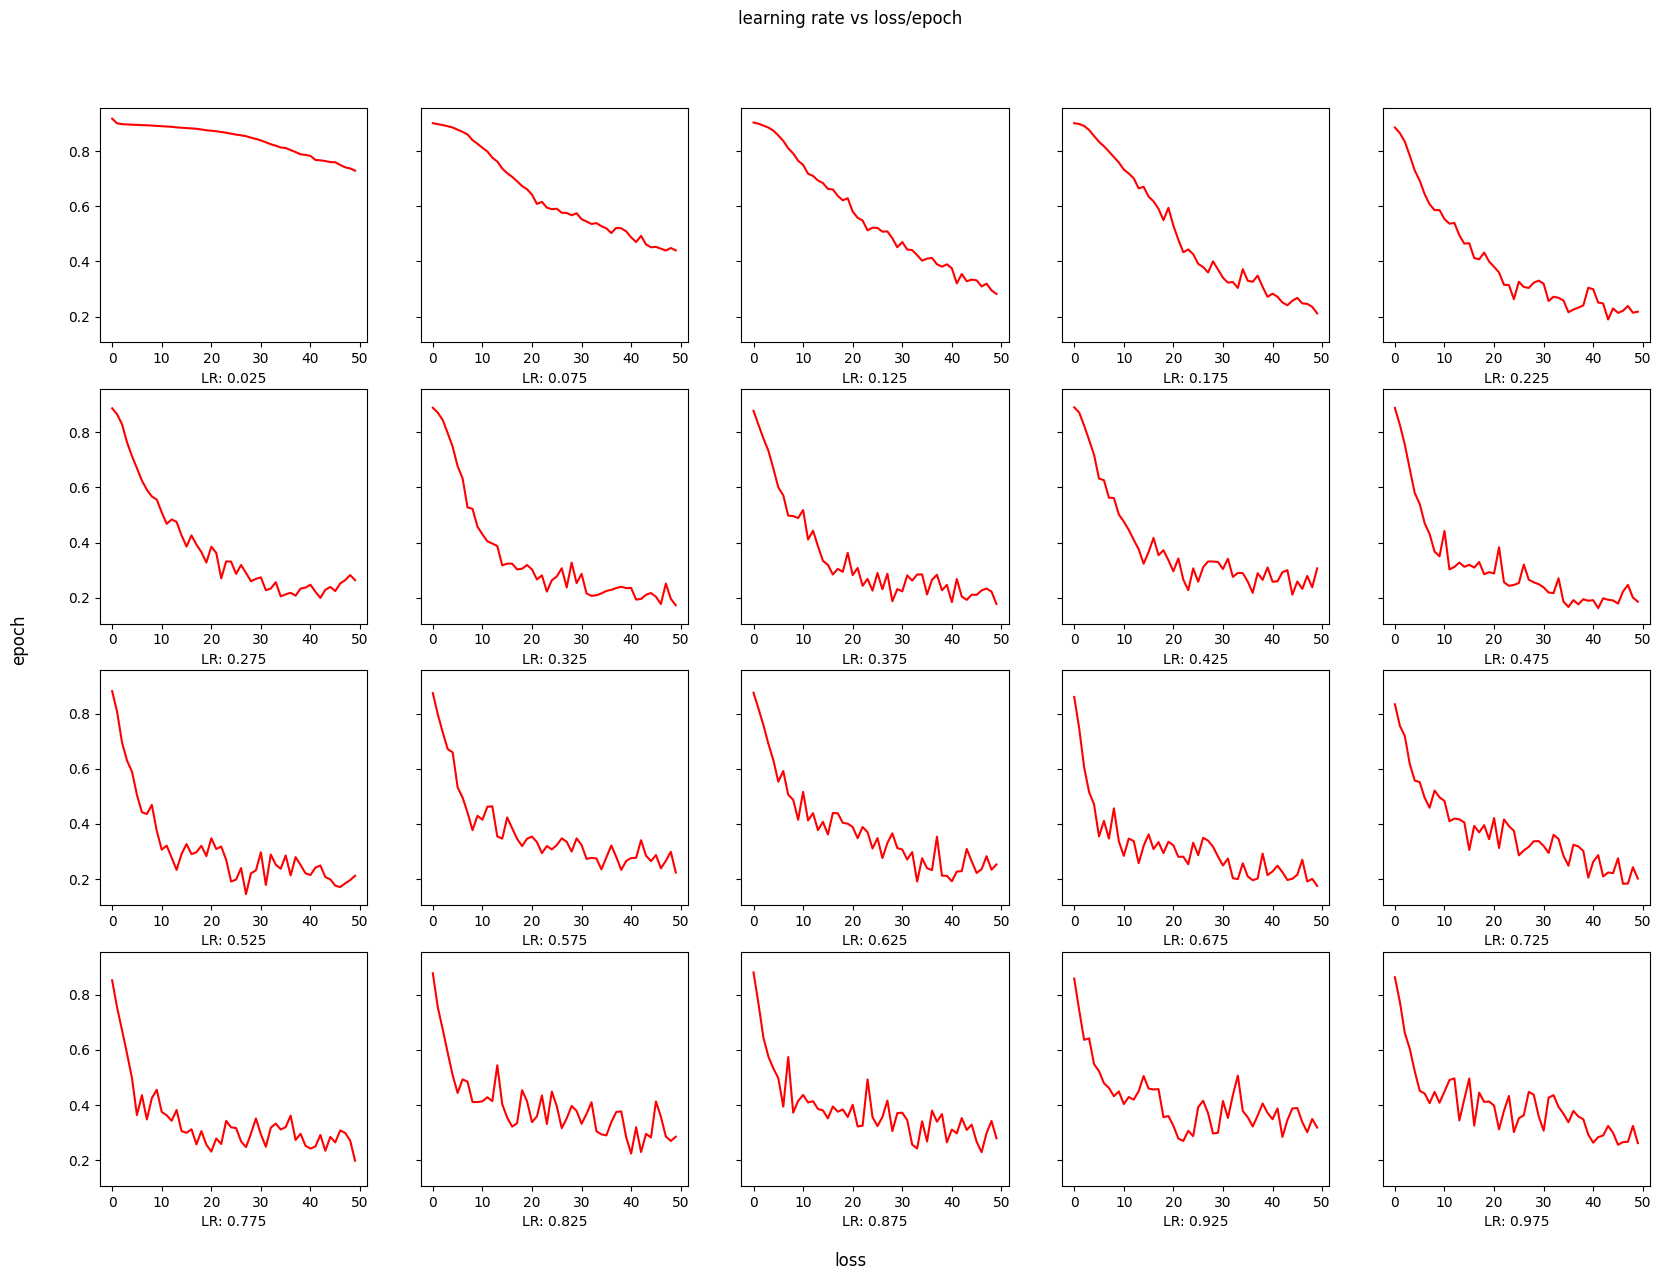

In [3]:
fig, axs = plt.subplots(4,5, figsize=(20, 14), sharey="all")
for i in range(4):
    for j in range(5):
        index = i*5 + j
        #print(index)
        lr = 0.025 + index * 0.050
        #print(lr)
        axs[i,j].plot(epoch[index],loss[index], 'r-')
        axs[i,j].set_xlabel(f"LR: {lr:.3f}")
fig.supxlabel("loss", x=0.5, y=0.05)
fig.supylabel("epoch", x=0.08, y=0.5)
fig.suptitle("learning rate vs loss/epoch", x=0.5, y=0.95)

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_25148\856357633.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Purples', number_o_lines)


Text(0.5, 0.95, 'Learning rate vs loss/epoch')

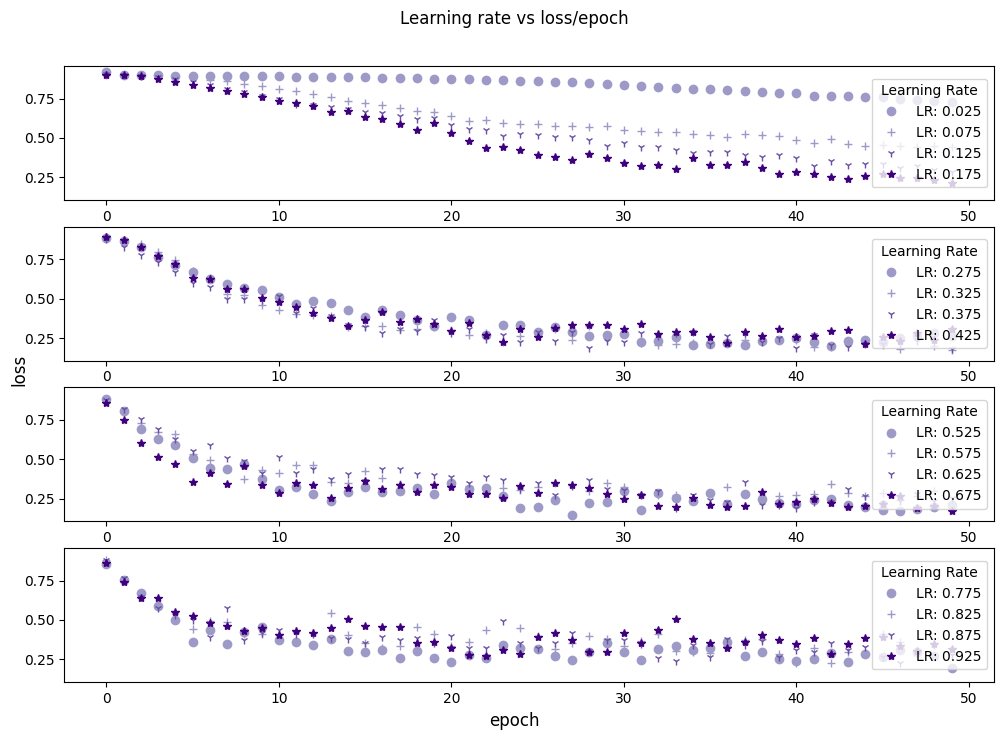

In [4]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

number_o_lines = 5
fig2, ax2 = plt.subplots(4, figsize=(12,8),sharey="all")
cmap = cm.get_cmap('Purples', number_o_lines)
start, stop = 0.4, 1.0
colors = [cmap(start + (stop - start) * i / (number_o_lines - 1)) for i in range(number_o_lines)]

for i in range(4):
    for j in range(5):
        index = i*5 + j
        #print(index)
        lr = 0.025 + index * 0.050
        #print(lr)
        if j == 0:
            ax2[i].plot(epoch[index],loss[index], 'o', label=f"LR: {lr:.3f}", color=colors[j]) 
        elif j == 1:
            ax2[i].plot(epoch[index],loss[index], '+', label=f"LR: {lr:.3f}", color=colors[j])
        elif j == 2:
            ax2[i].plot(epoch[index],loss[index], '1', label=f"LR: {lr:.3f}", color=colors[j])
        elif j == 3:
            ax2[i].plot(epoch[index],loss[index], '*', label=f"LR: {lr:.3f}", color=colors[j])
        #elif j == 4:
        #    ax2.plot(epoch[index],loss[index], '1', label=lr, color=colors[i])
            

ax2[0].legend(title="Learning Rate", loc=7)
ax2[1].legend(title="Learning Rate", loc=7)
ax2[2].legend(title="Learning Rate", loc=7)
ax2[3].legend(title="Learning Rate", loc=7)
fig2.supxlabel("epoch", x=0.5, y=0.05)
fig2.supylabel("loss", x=0.08, y=0.5)
fig2.suptitle("Learning rate vs loss/epoch", x=0.5, y=0.95)